In [2]:
import numpy as np
import pandas as pd
import sympy as sym
from matplotlib import pyplot as plt

<IPython.core.display.Javascript object>


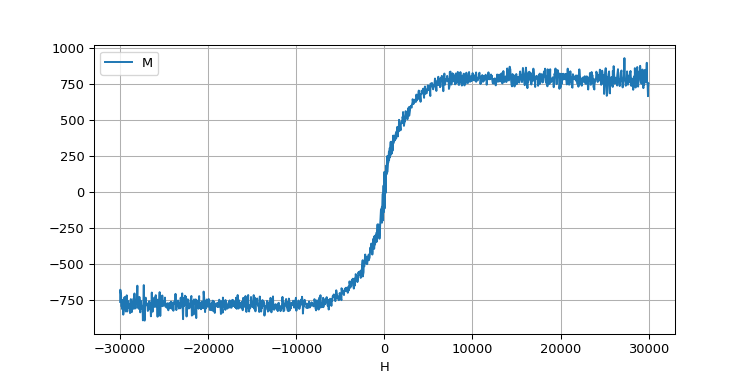

<AxesSubplot:xlabel='H'>

In [30]:
%matplotlib notebook

hyst1 = pd.read_csv('hyst1.csv', sep='\t')
hyst1 = hyst1.sort_values(by='H')

hyst1.plot(x='H', y='M', grid=True, figsize=(8,4))

<IPython.core.display.Javascript object>


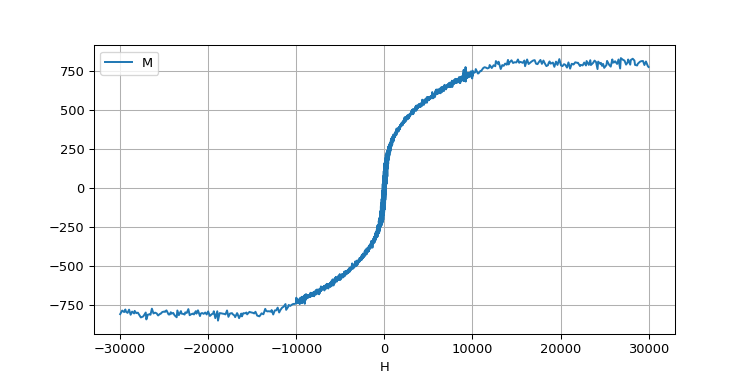

<AxesSubplot:xlabel='H'>

In [31]:
%matplotlib notebook

hyst2 = pd.read_csv('hyst2.csv', sep='\t')
hyst2 = hyst2.sort_values(by='H')
#hyst2 = hyst2.iloc[0:1600]

hyst2.plot(x='H', y='M', grid=True, figsize=(8,4))

In [32]:
#         1 - more steeep 2 - less steep
def func_to_fit(x, A1, A2, S1, S2):
    v1 = np.maximum(-A1, np.minimum(A1, x*S1))
    v2 = np.maximum(-A2, np.minimum(A2, x*S2))
    return v1+v2

[2.94268461e+02 4.89015964e+02 3.36510729e-01 8.86085979e-02]
H0_1 = 5518.831983450979
Ms_est = 489.0159642078969


<IPython.core.display.Javascript object>


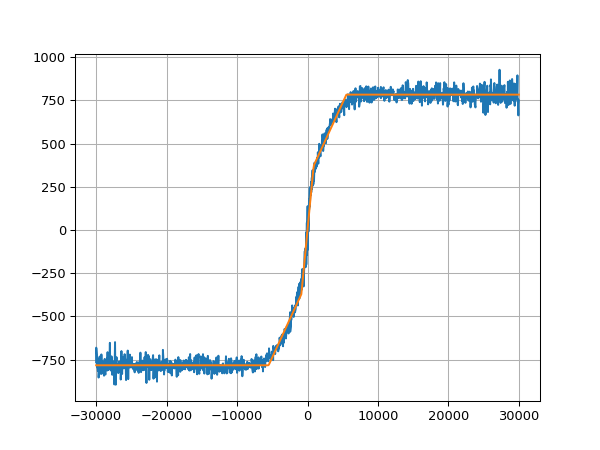

In [33]:
%matplotlib notebook
from scipy.optimize import curve_fit 


par1, ss1 = curve_fit(
    func_to_fit,
    hyst1.H,
    hyst1.M,
    p0=[300., 500., 3445.0e-4, 900.0e-4],
    maxfev=1000
)

print(par1)
H0_1 = par1[1]/par1[3]
print("H0_1 = {}".format(H0_1))
print("Ms_est = {}".format(par1[1]))

plt.plot()
plt.plot(hyst1.H, hyst1.M)
plt.plot(hyst1.H, func_to_fit(hyst1.H, *par1))
plt.grid(True)


[3.39255571e+02 4.56912935e+02 3.19817553e-01 4.19868925e-02]
H0_2 = 10882.275589958583
Ms_est = 456.9129353537964


<IPython.core.display.Javascript object>


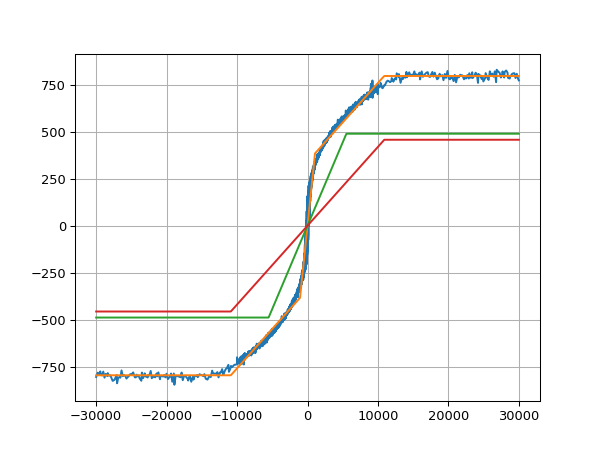

In [34]:
%matplotlib notebook
from scipy.optimize import curve_fit


par2, ss2 = curve_fit(
    func_to_fit,
    hyst2.H,
    hyst2.M,
    p0=[300., 500., 3445.0e-4, 400.0e-4],
    maxfev=1000
)

print(par2)
H0_2 = par2[1]/par2[3]
print("H0_2 = {}".format(H0_2))
print("Ms_est = {}".format(par2[1]))

plt.plot()
plt.plot(hyst2.H, hyst2.M)
plt.plot(hyst2.H, func_to_fit(hyst2.H, *par2))
plt.grid(True)

<IPython.core.display.Javascript object>


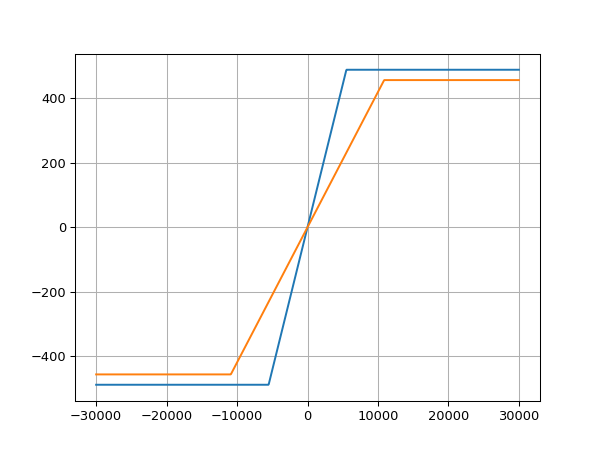

In [36]:
%matplotlib notebook
x = np.linspace(-30e3, 30e3, 1000)
plt.plot(x, np.maximum(-par1[1], np.minimum(par1[1], x*par1[3])))
plt.plot(x, np.maximum(-par2[1], np.minimum(par2[1], x*par2[3])))
plt.grid(True)

<IPython.core.display.Javascript object>


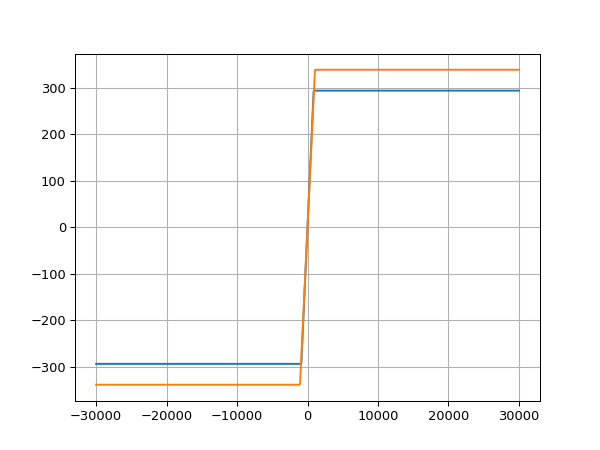

In [38]:
%matplotlib notebook
x = np.linspace(-30e3, 30e3, 1000)
plt.plot(x, np.maximum(-par1[0], np.minimum(par1[0], x*par1[2])))
plt.plot(x, np.maximum(-par2[0], np.minimum(par2[0], x*par2[2])))
plt.grid(True)

<IPython.core.display.Javascript object>


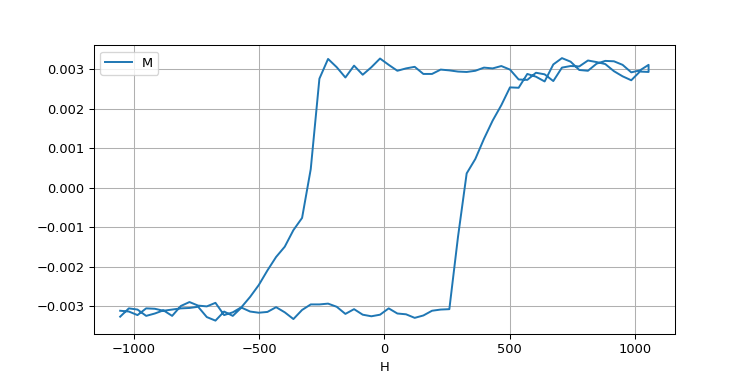

<AxesSubplot:xlabel='H'>

In [40]:
hyst_p1 = pd.read_csv('hyst_p1.csv', sep='\t')

hyst_p1.plot(x='H', y='M', grid=True, figsize=(8,4))